# Лабораторная работа №3

# Кластеризация данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, euclidean_distances

In [2]:
df = pd.read_csv('1heart.csv')
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122.0,N,0.0,Up,0
5,39,M,NAP,120.0,339,0,Normal,170.0,N,0.0,Up,0
6,45,F,ATA,130.0,237,0,Normal,170.0,N,0.0,Up,0
7,54,M,ATA,110.0,208,0,Normal,142.0,N,0.0,Up,0
8,37,M,ASY,140.0,207,0,Normal,130.0,Y,1.5,Flat,1
9,48,F,ATA,120.0,284,0,Normal,120.0,N,0.0,Up,0


# Предварительный анализ данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             925 non-null    int64  
 1   Sex             925 non-null    object 
 2   ChestPainType   925 non-null    object 
 3   RestingBP       923 non-null    float64
 4   Cholesterol     924 non-null    object 
 5   FastingBS       925 non-null    int64  
 6   RestingECG      924 non-null    object 
 7   MaxHR           924 non-null    float64
 8   ExerciseAngina  925 non-null    object 
 9   Oldpeak         925 non-null    float64
 10  ST_Slope        925 non-null    object 
 11  HeartDisease    925 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 86.8+ KB


In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
print(df.duplicated().sum())

3


In [6]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [7]:
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         2
Cholesterol       1
FastingBS         0
RestingECG        1
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


# Конвертация данных

In [8]:
df = df.dropna(subset=['RestingBP'])
df = df.dropna(subset=['RestingECG'])
df = df.dropna(subset=['MaxHR'])
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [9]:
df['Cholesterol'] = df['Cholesterol'].str.replace("a","")
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 924
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 93.2+ KB


# Реиндексация датасета

In [10]:
df = df.drop('Sex', axis=1)
df = df.drop('ChestPainType', axis=1)
df = df.drop('RestingECG', axis=1)
df = df.drop('ExerciseAngina', axis=1)
df = df.drop('ST_Slope', axis=1)
df.head(20)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140.0,289,0,172.0,0.0,0
1,49,160.0,180,0,156.0,1.0,1
2,37,130.0,283,0,98.0,0.0,0
3,48,138.0,214,0,108.0,1.5,1
4,54,150.0,195,0,122.0,0.0,0
5,39,120.0,339,0,170.0,0.0,0
6,45,130.0,237,0,170.0,0.0,0
7,54,110.0,208,0,142.0,0.0,0
8,37,140.0,207,0,130.0,1.5,1
9,48,120.0,284,0,120.0,0.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 924
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    float64
 2   Cholesterol   918 non-null    int64  
 3   FastingBS     918 non-null    int64  
 4   MaxHR         918 non-null    float64
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 57.4 KB


In [12]:
sc = StandardScaler()
X_sc = sc.fit_transform(df)
linked = linkage(X_sc, method = 'ward')

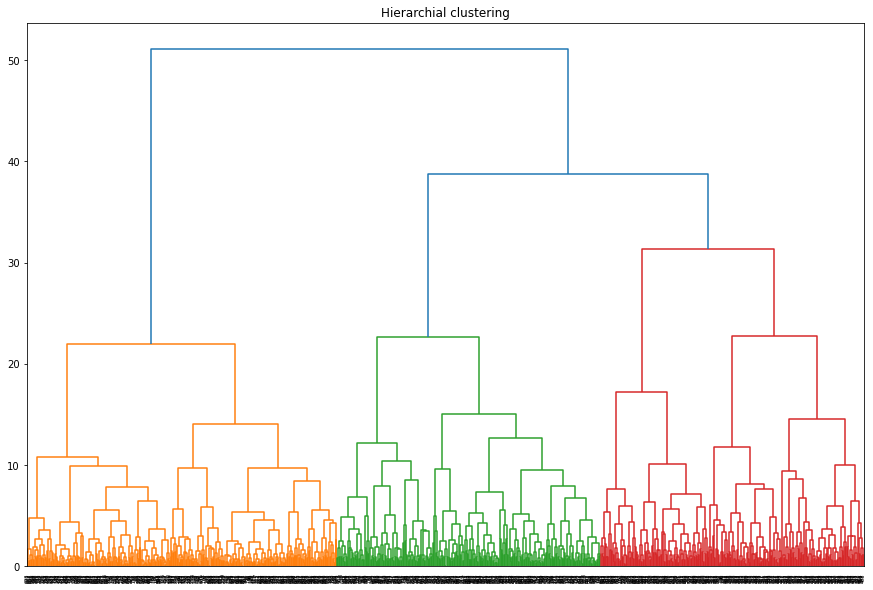

In [58]:
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()

In [14]:
df['cluster'] = fcluster(linked, 3, criterion='maxclust')
df.groupby('cluster').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
cluster,,,,,,,
1,49.364706,129.305882,238.632353,0.000000,149.688235,0.346765,0.000000
2,54.948097,135.287197,248.346021,0.020761,131.910035,1.536678,0.986159
3,57.055363,133.211073,102.550173,0.719723,126.498270,0.874740,0.775087


После усреднения значений можно увидеть, что на выделение кластеров оказали влияние такие признаки, как: Cholesterol, HeartDisease, FastingBS.

1. К первому кластеру относятся абсолютно здоровые люди без особых отклонений.
2. Ко второму кластеру относятся люди с высоким значением депрессии ST.
3. К третьему кластеру относятся люди с повышенным уровнем сахара в крови, что может говорить о сахарном диабете. Также здесь находятся люди с пониженным холестерином. Это сказывается на работе сердца и может привести к геморрагическому инсульту.

Вывод: в ходе выполнения лабораторной работы были изучены алгоритмы и методы кластерного анализа. Над набором данных  была проведена кластеризация иерархическим агломеративным методом. Было выявлено 3 кластера - "Здоровые люди", "Люди с высоки уровнем депрессии ST", "Люди с диабетом/пониженным холестерином".